# **Mount drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **Import important libraries**

In [3]:
import cv2
import numpy as np
from math import floor
from google.colab.patches import cv2_imshow
import matplotlib.image as img
from matplotlib import pyplot as plt
import math
from scipy.ndimage import convolve
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_float

# **Q1) SSIM**

In [139]:
def ssim(img1, img2):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5]  
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean(), ssim_map

# **Adding blur for test image**

SSIM Index =  0.7233977994781344


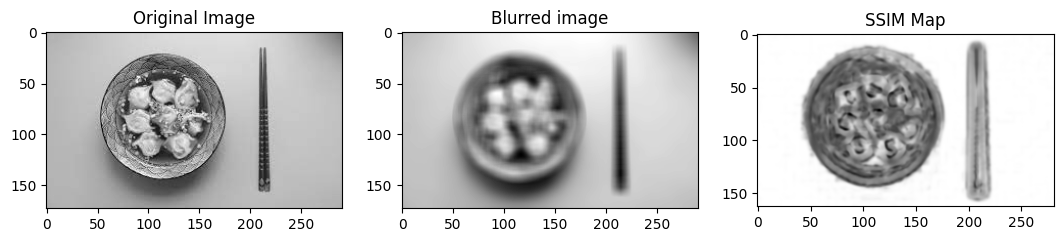

In [141]:
ref_img = cv2.imread('/content/drive/MyDrive/EE608/HW_3_data/food1.jpg',0)
img = cv2.imread('/content/drive/MyDrive/EE608/HW_3_data/food1.jpg',0)
# Add noise to the reference image
noisy_img = ref_img.copy()
cv2.randn(noisy_img, 0, 50)

# Blur the reference image
# blurred_img = cv2.GaussianBlur(ref_img, (7, 7), 1.5)
blurred_img = cv2.blur(ref_img,(10,10))
a,b = ssim(ref_img, blurred_img)
print("SSIM Index = ",a)
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (13,9))

ax1.imshow(ref_img, cmap='gray')
ax1.set_title('Original Image')
# Display the first image in the first subplot
ax2.imshow(blurred_img, cmap='gray')
ax2.set_title('Blurred image')

# Display the second image in the second subplot
ax3.imshow(b,cmap='gray')
ax3.set_title('SSIM Map')

# Show the figure
plt.show()

SSIM Index =  0.7155455336170223


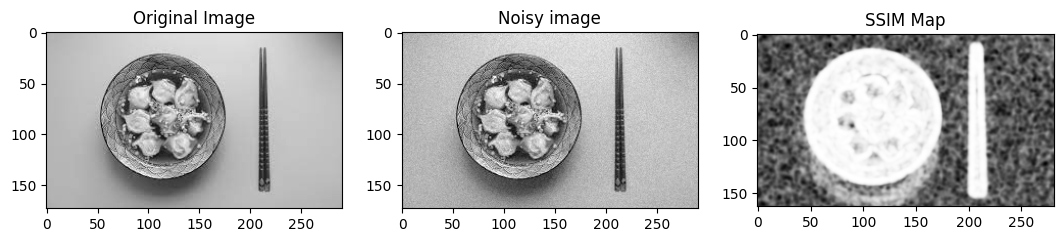

In [142]:
mean = 0
variance = 50
sigma = np.sqrt(variance)
gaussian = np.random.normal(mean, sigma, ref_img.shape)
noisy_image = np.clip(ref_img + gaussian, 0, 255).astype(np.uint8)
a,b = ssim(ref_img, noisy_image)

# plt.imshow(b,cmap='gray')
print("SSIM Index = ",a)
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (13,9))

ax1.imshow(ref_img, cmap='gray')
ax1.set_title('Original Image')
# Display the first image in the first subplot
ax2.imshow(noisy_image, cmap='gray')
ax2.set_title('Noisy image')

# Display the second image in the second subplot
ax3.imshow(b,cmap='gray')
ax3.set_title('SSIM Map')

# Show the figure
plt.show()

SSIM Index =  0.9572880450600949


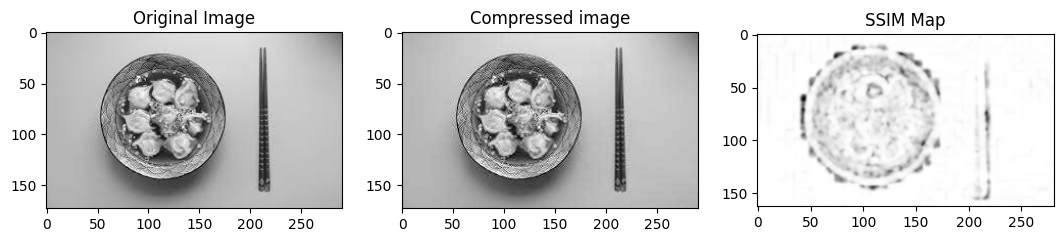

In [143]:
# Compress the image and save it as a JPEG file with 50% quality
cv2.imwrite('/content/drive/MyDrive/EE608/HW_3_data/compress.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 50])

# Load the compressed image
compressed_img = cv2.imread('/content/drive/MyDrive/EE608/HW_3_data/compress.jpg',0)
a,b = ssim(ref_img, compressed_img)
print("SSIM Index = ",a)
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (13,9))

ax1.imshow(ref_img, cmap='gray')
ax1.set_title('Original Image')
# Display the first image in the first subplot
ax2.imshow(compressed_img, cmap='gray')
ax2.set_title('Compressed image')

# Display the second image in the second subplot
ax3.imshow(b,cmap='gray')
ax3.set_title('SSIM Map')

# Show the figure
plt.show()

# **Q2) Harris Corner Detection**

In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d

def harris_corner_detection(img, window_size=3, k=0.04, threshold=0.1):
    # Convert the image to grayscale
    if len(img.shape) > 2:
        img = np.mean(img, axis=2)

    # Compute image derivatives
    dx = np.array([[-1, 0, 1]])
    dy = dx.T
    Ix = convolve2d(img, dx, mode='same')
    Iy = convolve2d(img, dy, mode='same')

    # Compute products of derivatives at every pixel
    Ix2 = gaussian_filter(Ix * Ix, sigma=window_size)
    Iy2 = gaussian_filter(Iy * Iy, sigma=window_size)
    Ixy = gaussian_filter(Ix * Iy, sigma=window_size)

    # Compute Harris corner response
    det = Ix2 * Iy2 - Ixy * Ixy
    trace = Ix2 + Iy2
    response = det - k * (trace ** 2)

    # Threshold the response to obtain corner locations
    corner_coords = np.argwhere(response > threshold * response.max())
    return corner_coords


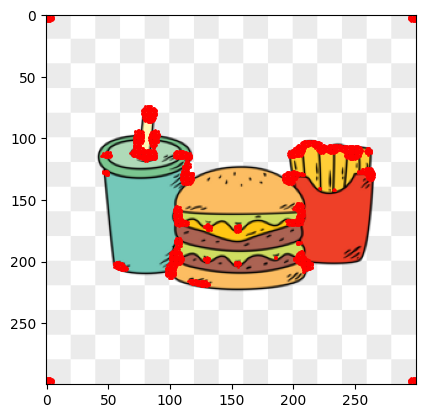

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an image
# img = cv2.imread('example_image.jpg')
img = cv2.imread('/content/drive/MyDrive/EE608/HW_3_data/food3.png')
# Detect corners
corners = harris_corner_detection(img)

# Visualize the corners
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.plot(corners[:,1], corners[:,0], 'r.', markersize=1)
plt.show()


# **Q3) Hough Transform**

**For line**

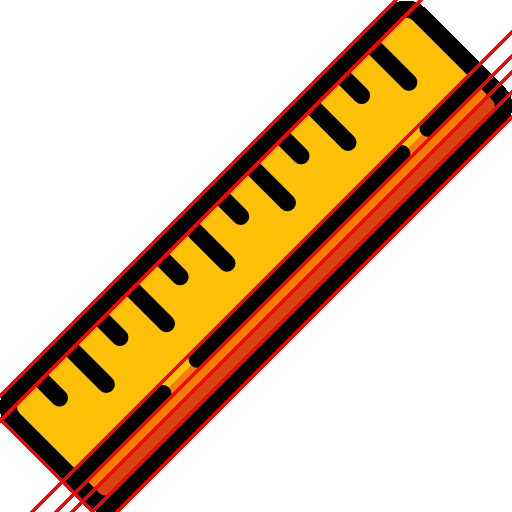

In [4]:
# Load an image
img = cv2.imread('/content/drive/MyDrive/EE608/HW_3_data/ruler.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Apply Hough Transform to detect lines
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=100)

# Draw the detected lines on the original image
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Show the result
cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


**For circle**

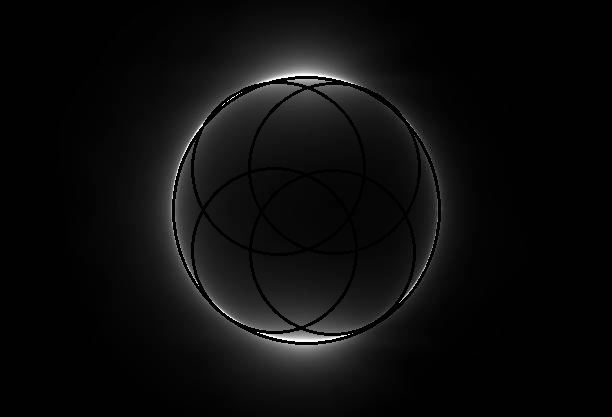

In [7]:
import cv2
import numpy as np

# Load an image
img = cv2.imread('/content/drive/MyDrive/EE608/HW_3_data/circle.jpg',0)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
gray_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Apply Hough Transform to detect circles
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=200, param2=20, minRadius=0, maxRadius=0)

# Draw the detected circles on the original image
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 0, 255), 2)

# Show the result
cv2_imshow(img)


# **Q4)1) Implement the connected components algorithm and use it to label the binarized version of I. Demonstrate your result using any of the gray scale images mentioned above.**

In [62]:
def connected_components(img):
    # Define a dictionary to store the equivalences between labels
    equivalences = {}

    # Initialize the labelled image with zeros
    labelled_img = np.zeros_like(img, dtype=int)

    # Initialize the label counter
    label = 1

    # Iterate over each pixel of the input image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # If the pixel is part of the foreground
            if img[i, j] == 1:
                # Find the neighbouring pixels with a label
                neighbours = []
                if i > 0 and labelled_img[i-1, j] > 0:
                    neighbours.append(labelled_img[i-1, j])
                if j > 0 and labelled_img[i, j-1] > 0:
                    neighbours.append(labelled_img[i, j-1])
                # If there are no neighbouring pixels with a label
                if not neighbours:
                    # Assign a new label to the pixel
                    labelled_img[i, j] = label
                    label += 1
                else:
                    # Find the smallest label among the neighbours
                    min_label = min(neighbours)
                    labelled_img[i, j] = min_label
                    # Update the equivalences dictionary
                    for neighbour in neighbours:
                        if neighbour != min_label:
                            equivalences[neighbour] = min_label

    # Apply the equivalences to obtain the final labels
    for i in range(labelled_img.shape[0]):
        for j in range(labelled_img.shape[1]):
            if labelled_img[i, j] > 0:
                while labelled_img[i, j] in equivalences:
                    labelled_img[i, j] = equivalences[labelled_img[i, j]]
    
    # Renumber the labels to start from 1
    unique_labels = np.unique(labelled_img)
    for i, label in enumerate(unique_labels):
        if label > 0:
            labelled_img[labelled_img == label] = i

    return labelled_img,unique_labels


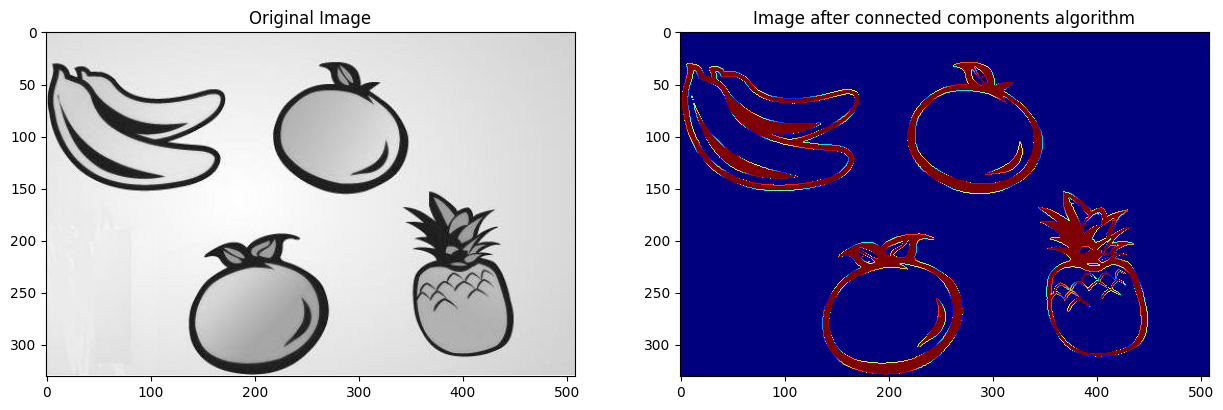

In [63]:
img = cv2.imread('/content/drive/MyDrive/EE608/HW_3_data/fruits.png', cv2.IMREAD_GRAYSCALE)

# Binarize the image using Otsu's method
bin_img = cv2.threshold(img, 0, 1, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Apply the Connected Components Algorithm to obtain the labelled image
labelled_img, unique_labels = connected_components(bin_img)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,10))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')

ax2.imshow(bin_img, cmap="jet")
ax2.set_title('Image after connected components algorithm')
plt.show()

# **Q4)2) Implement minor blob removal to get rid of minor blobs.**

use if labelled_img[i, j] != max_label and sizes[labelled_img[i, j] - 1] < 120: to remove all regions smaller than 120 pixels.


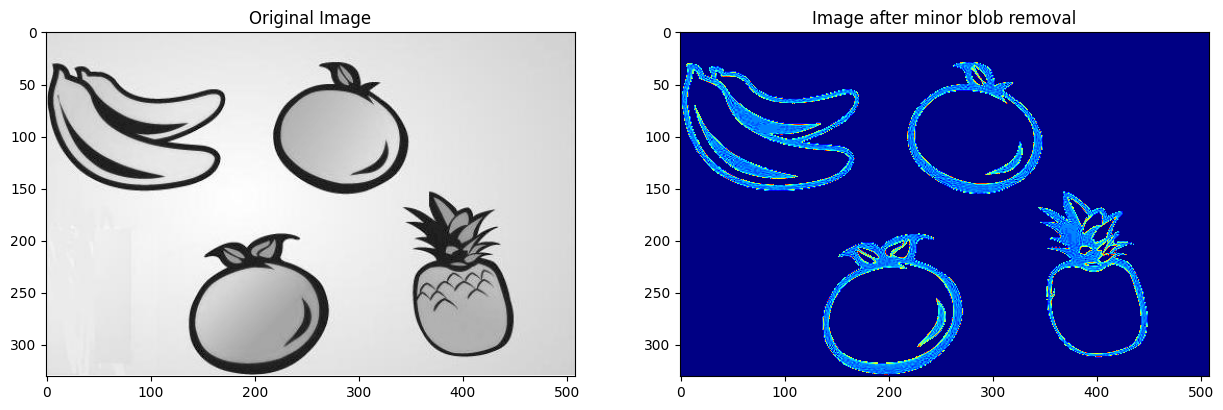

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image as grayscale
img = cv2.imread('/content/drive/MyDrive/EE608/HW_3_data/fruits.png', cv2.IMREAD_GRAYSCALE)

# Binarize the image using Otsu's method
bin_img = cv2.threshold(img, 0, 1, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Apply the Connected Components Algorithm to obtain the labelled image
# labelled_img, num_labels = cv2.connectedComponents(bin_img.astype(np.uint8))
labelled_img, num_labels = connected_components(bin_img)
# Compute the region sizes
sizes = np.bincount(labelled_img.flatten())[1:]

# Find the largest region
max_size = np.max(sizes)
max_label = np.argmax(sizes) + 1
blob_img = img.copy()
# Remove all pixels that do not belong to the largest region
for i in range(labelled_img.shape[0]):
    for j in range(labelled_img.shape[1]):
        if labelled_img[i, j] != max_label and sizes[labelled_img[i, j] - 1] < 120:
            blob_img[i, j] = 1
print("use if labelled_img[i, j] != max_label and sizes[labelled_img[i, j] - 1] < 120: to remove all regions smaller than 120 pixels.")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,10))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')

ax2.imshow(blob_img, cmap="jet")
ax2.set_title("Image after minor blob removal")
plt.show()

# **Q5)1) Implement the following filters that accept a binary image I and window B as inputs:**

# **dilate**

for window B = CROSS(5)


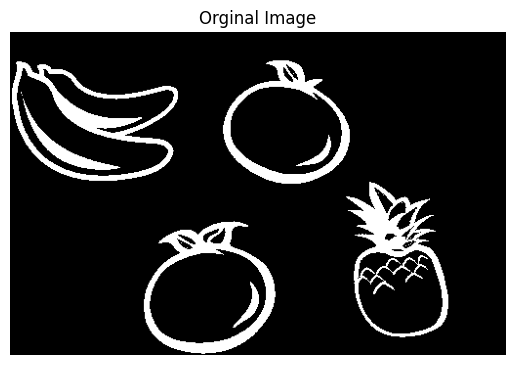

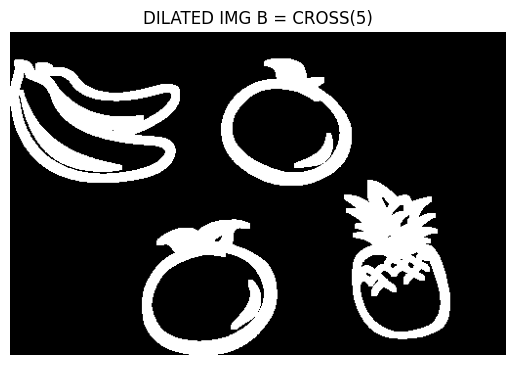

In [8]:
import cv2
import numpy as np

def dilate(img, se):
    # Initialize an empty output image
    output_img = np.zeros_like(img)

    # Get the size of the structuring element
    se_height, se_width = se.shape

    # Pad the input image with zeros
    padded_img = np.pad(img, ((se_height//2, se_height//2), (se_width//2, se_width//2)), mode='constant')

    # Loop over the padded image
    for i in range(se_height//2, padded_img.shape[0]-se_height//2):
        for j in range(se_width//2, padded_img.shape[1]-se_width//2):
            # Get the neighborhood defined by the structuring element
            neighborhood = padded_img[i-se_height//2:i+se_height//2+1, j-se_width//2:j+se_width//2+1]

            # Apply the dilation operation
            if np.any(neighborhood == 255):
                output_img[i-se_height//2, j-se_width//2] = 255

    return output_img

img = cv2.imread('/content/drive/MyDrive/EE608/HW_3_data/fruits.png', 0)
# Threshold image
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Define the structuring element
se = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# Apply dilation filter
dilated_img = dilate(img, se)
print("for window B = CROSS(5)")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Orginal Image")
plt.show()
plt.imshow(cv2.cvtColor(dilated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("DILATED IMG B = CROSS(5)")
plt.show()


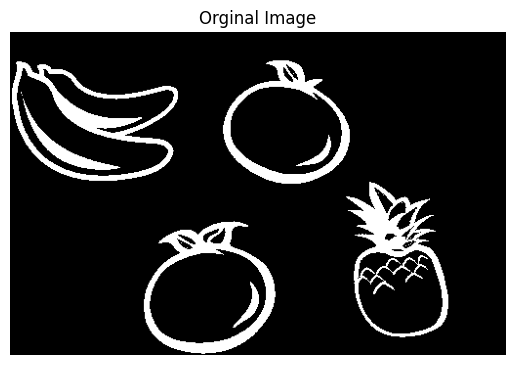

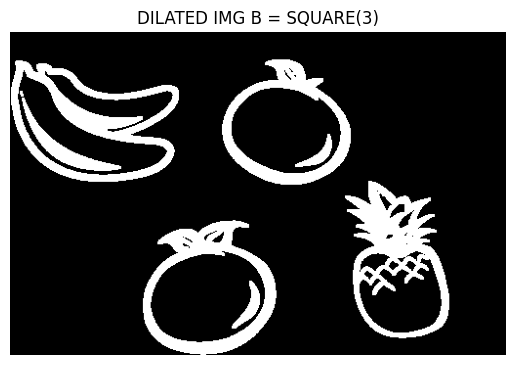

In [9]:
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Apply dilation filter
dilated_img = dilate(img, se)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Orginal Image")
plt.show()
plt.imshow(cv2.cvtColor(dilated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("DILATED IMG B = SQUARE(3)")
plt.show()

# **erosion**

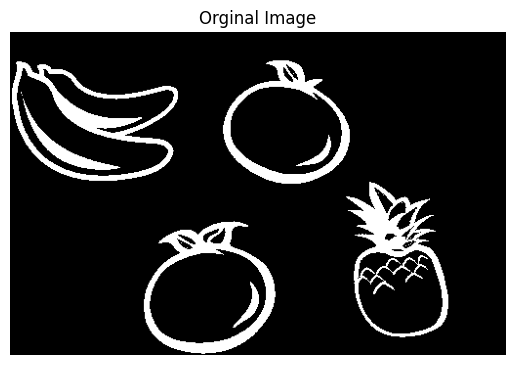

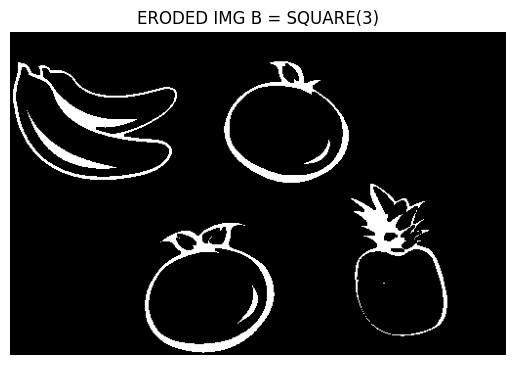

In [10]:
def erode(img, se):
    # Initialize an empty output image
    output_img = np.zeros_like(img)

    # Get the size of the structuring element
    se_height, se_width = se.shape

    # Pad the input image with zeros
    padded_img = np.pad(img, ((se_height//2, se_height//2), (se_width//2, se_width//2)), mode='constant')

    # Loop over the padded image
    for i in range(se_height//2, padded_img.shape[0]-se_height//2):
        for j in range(se_width//2, padded_img.shape[1]-se_width//2):
            # Get the neighborhood defined by the structuring element
            neighborhood = padded_img[i-se_height//2:i+se_height//2+1, j-se_width//2:j+se_width//2+1]

            # Apply the erosion operation
            if np.all(neighborhood == 255):
                output_img[i-se_height//2, j-se_width//2] = 255

    return output_img

img = cv2.imread('/content/drive/MyDrive/EE608/HW_3_data/fruits.png', 0)
# Threshold image
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Define the structuring element
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Apply erosion filter
eroded_img = erode(img, se)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Orginal Image")
plt.show()
plt.imshow(cv2.cvtColor(eroded_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("ERODED IMG B = SQUARE(3)")
plt.show()


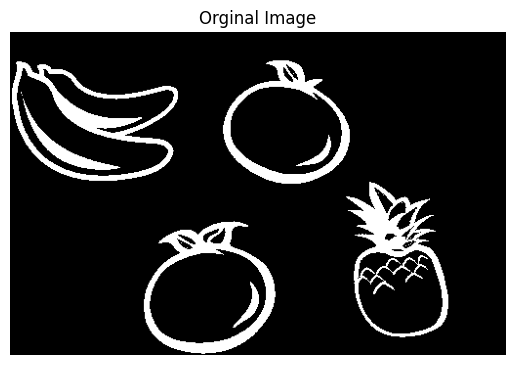

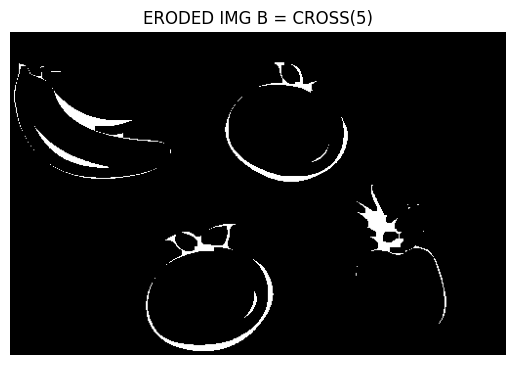

In [11]:
# Define the structuring element
se = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# Apply erosion filter
eroded_img = erode(img, se)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Orginal Image")
plt.show()
plt.imshow(cv2.cvtColor(eroded_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("ERODED IMG B = CROSS(5)")
plt.show()


# **median**

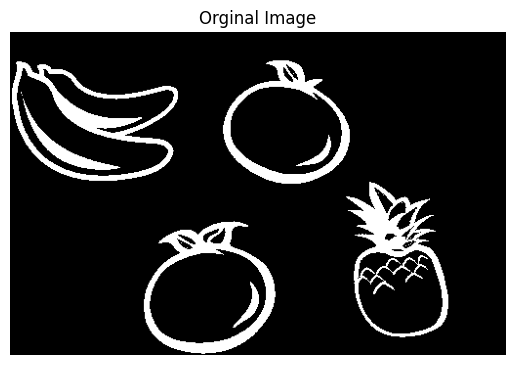

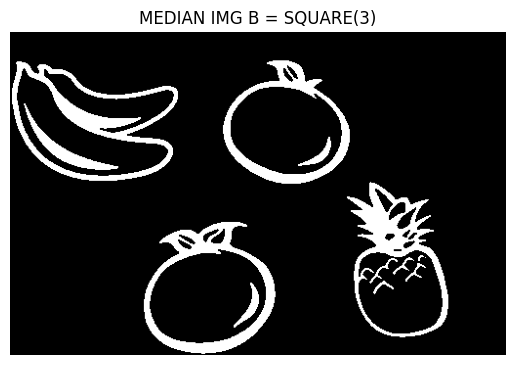

In [12]:
img = cv2.imread('/content/drive/MyDrive/EE608/HW_3_data/fruits.png', 0)
# Threshold image
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
def median(img, se):
    # Get the size of the structuring element
    se_height, se_width = se.shape

    # Pad the input image with zeros
    padded_img = np.pad(img, ((se_height//2, se_height//2), (se_width//2, se_width//2)), mode='constant')

    # Initialize an empty output image
    output_img = np.zeros_like(img)

    # Loop over the padded image
    for i in range(se_height//2, padded_img.shape[0]-se_height//2):
        for j in range(se_width//2, padded_img.shape[1]-se_width//2):
            # Get the neighborhood defined by the structuring element
            neighborhood = padded_img[i-se_height//2:i+se_height//2+1, j-se_width//2:j+se_width//2+1]

            # Apply the median filter operation
            median_pixel = np.median(neighborhood)
            output_img[i-se_height//2, j-se_width//2] = median_pixel

    return output_img
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
median_img = median(img, se)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Orginal Image")
plt.show()
plt.imshow(cv2.cvtColor(median_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("MEDIAN IMG B = SQUARE(3)")
plt.show()

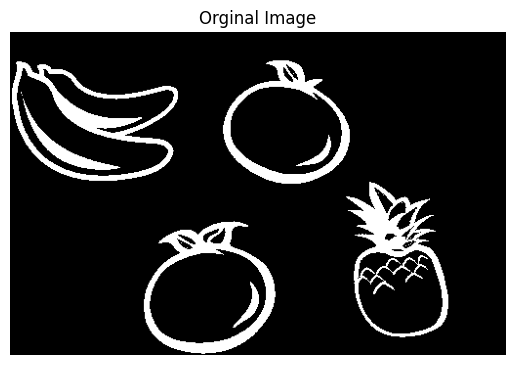

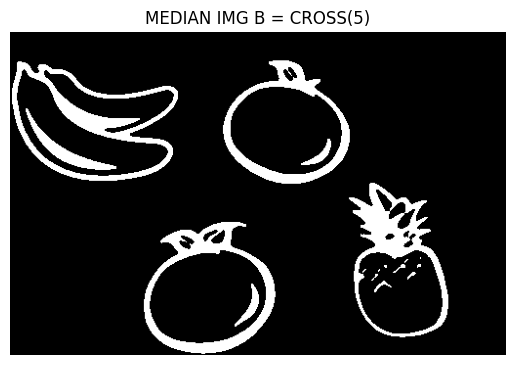

In [13]:
se = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
median_img = median(img, se)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Orginal Image")
plt.show()
plt.imshow(cv2.cvtColor(median_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("MEDIAN IMG B = CROSS(5)")
plt.show()

# **Q5)2) Verify that DILATE and ERODE operators are duals of each other with respect to complementation.**

In [15]:
img = cv2.imread('/content/drive/MyDrive/EE608/HW_3_data/fruits.png', 0)
# Threshold image
bin_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

In [16]:
# Invert the image
img_complement = cv2.bitwise_not(bin_img)

**complement of erode is dilate**

In [22]:
se = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

In [23]:
eroded_img = erode(img_complement, se)

In [24]:
compelement_erode = cv2.bitwise_not(eroded_img)

In [25]:
dilated_img = dilate(bin_img, se)

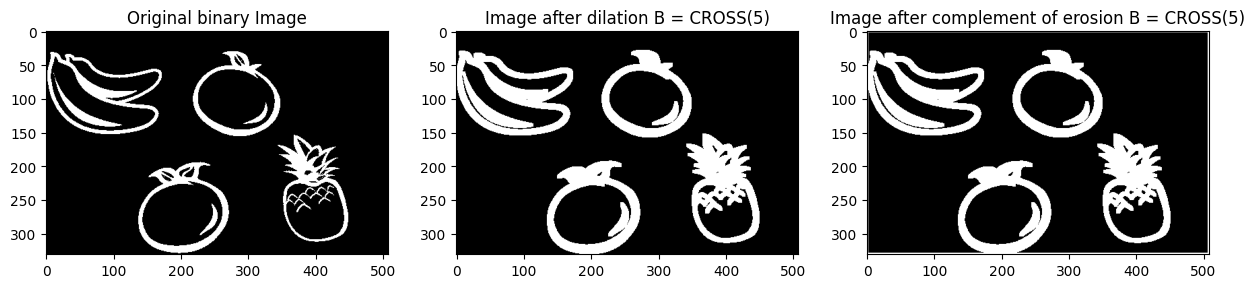

In [26]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (15,9))
ax1.imshow(cv2.cvtColor(bin_img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original binary Image')
# Display the first image in the first subplot
ax2.imshow(cv2.cvtColor(dilated_img, cv2.COLOR_BGR2RGB))
ax2.set_title('Image after dilation B = CROSS(5)')

# Display the second image in the second subplot
ax3.imshow(cv2.cvtColor(compelement_erode, cv2.COLOR_BGR2RGB))
ax3.set_title('Image after complement of erosion B = CROSS(5)')

# Show the figure
plt.show()

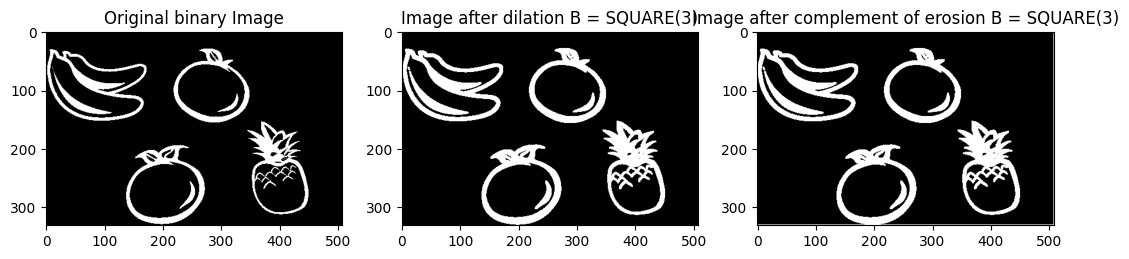

In [27]:
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
eroded_img = erode(img_complement, se)
compelement_erode = cv2.bitwise_not(eroded_img)
dilated_img = dilate(bin_img, se)
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (13,9))
ax1.imshow(cv2.cvtColor(bin_img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original binary Image')
# Display the first image in the first subplot
ax2.imshow(cv2.cvtColor(dilated_img, cv2.COLOR_BGR2RGB))
ax2.set_title('Image after dilation B = SQUARE(3)')

# Display the second image in the second subplot
ax3.imshow(cv2.cvtColor(compelement_erode, cv2.COLOR_BGR2RGB))
ax3.set_title('Image after complement of erosion B = SQUARE(3)')

# Show the figure
plt.show()

**complement of dilation is erosion**

In [28]:
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

dilate_img = dilate(img_complement, se)
compelement_dilate = cv2.bitwise_not(dilate_img)
eroded_img = erode(bin_img, se)

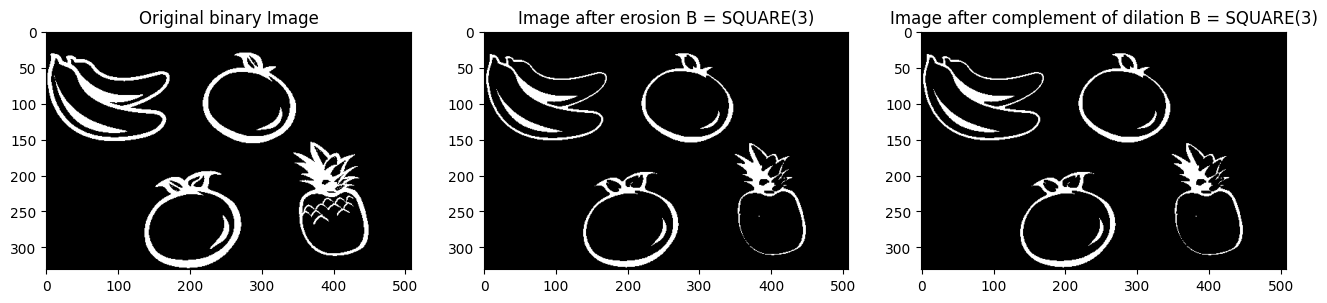

In [31]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (16,9))
ax1.imshow(cv2.cvtColor(bin_img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original binary Image')
# Display the first image in the first subplot
ax2.imshow(cv2.cvtColor(eroded_img, cv2.COLOR_BGR2RGB))
ax2.set_title('Image after erosion B = SQUARE(3)')

# Display the second image in the second subplot
ax3.imshow(cv2.cvtColor(compelement_dilate, cv2.COLOR_BGR2RGB))
ax3.set_title('Image after complement of dilation B = SQUARE(3)')

# Show the figure
plt.show()

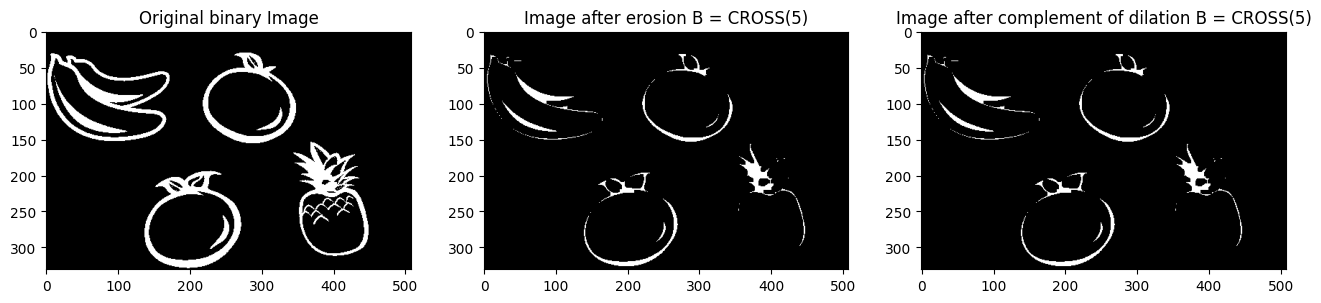

In [32]:
se = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

dilate_img = dilate(img_complement, se)
compelement_dilate = cv2.bitwise_not(dilate_img)
eroded_img = erode(bin_img, se)
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (16,9))
ax1.imshow(cv2.cvtColor(bin_img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original binary Image')
# Display the first image in the first subplot
ax2.imshow(cv2.cvtColor(eroded_img, cv2.COLOR_BGR2RGB))
ax2.set_title('Image after erosion B = CROSS(5)')

# Display the second image in the second subplot
ax3.imshow(cv2.cvtColor(compelement_dilate, cv2.COLOR_BGR2RGB))
ax3.set_title('Image after complement of dilation B = CROSS(5)')

# Show the figure
plt.show()

**complement of median is median**

In [33]:
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

median_img = median(img_complement, se)
compelement_median = cv2.bitwise_not(median_img)
median_img_org = median(bin_img, se)

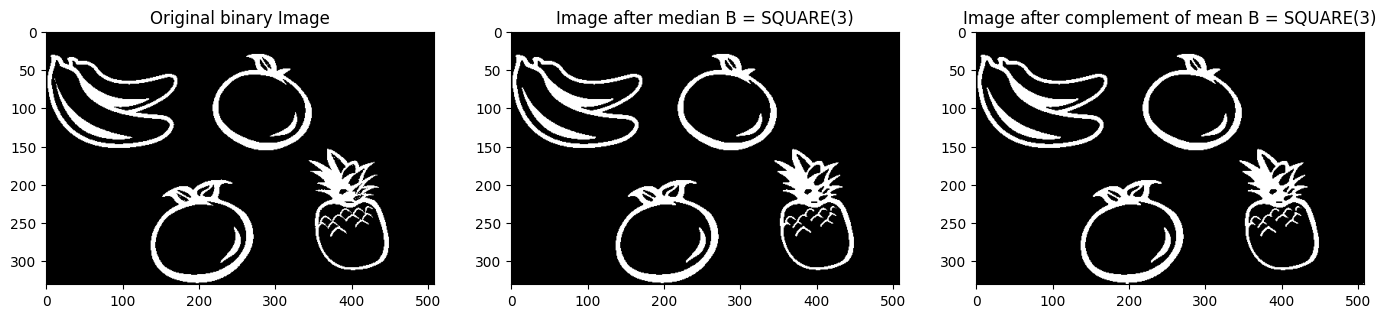

In [34]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (17,9))
ax1.imshow(cv2.cvtColor(bin_img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original binary Image')
# Display the first image in the first subplot
ax2.imshow(cv2.cvtColor(median_img_org, cv2.COLOR_BGR2RGB))
ax2.set_title('Image after median B = SQUARE(3)')

# Display the second image in the second subplot
ax3.imshow(cv2.cvtColor(compelement_median, cv2.COLOR_BGR2RGB))
ax3.set_title('Image after complement of mean B = SQUARE(3)')

# Show the figure
plt.show()

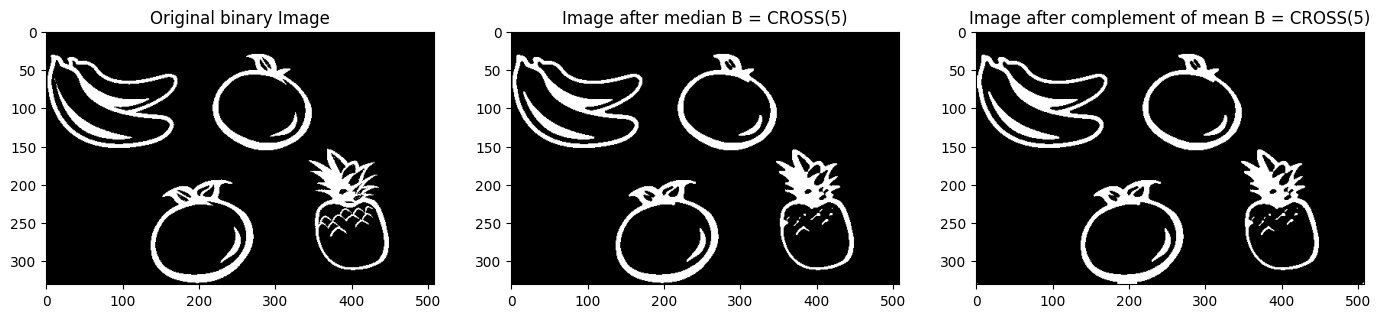

In [35]:
se = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

median_img = median(img_complement, se)
compelement_median = cv2.bitwise_not(median_img)
median_img_org = median(bin_img, se)
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (17,9))
ax1.imshow(cv2.cvtColor(bin_img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original binary Image')
# Display the first image in the first subplot
ax2.imshow(cv2.cvtColor(median_img_org, cv2.COLOR_BGR2RGB))
ax2.set_title('Image after median B = CROSS(5)')

# Display the second image in the second subplot
ax3.imshow(cv2.cvtColor(compelement_median, cv2.COLOR_BGR2RGB))
ax3.set_title('Image after complement of mean B = CROSS(5)')

# Show the figure
plt.show()

# **Q5)3) Implement the compound operators OPEN and CLOSE**

In [48]:
img = cv2.imread('/content/drive/MyDrive/EE608/HW_3_data/fruits.png', 0)
# Threshold image
bin_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

In [49]:
def open(bin_img,se):
  eroded_img = erode(bin_img, se)
  open = dilate(eroded_img, se)
  return open

def close(bin_img,se):
  dilate_img = dilate(bin_img, se)
  close = erode(dilate_img, se)
  return close


In [38]:
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
open = open(bin_img,se)
close = close(bin_img,se)

using window B = SQUARE(3)


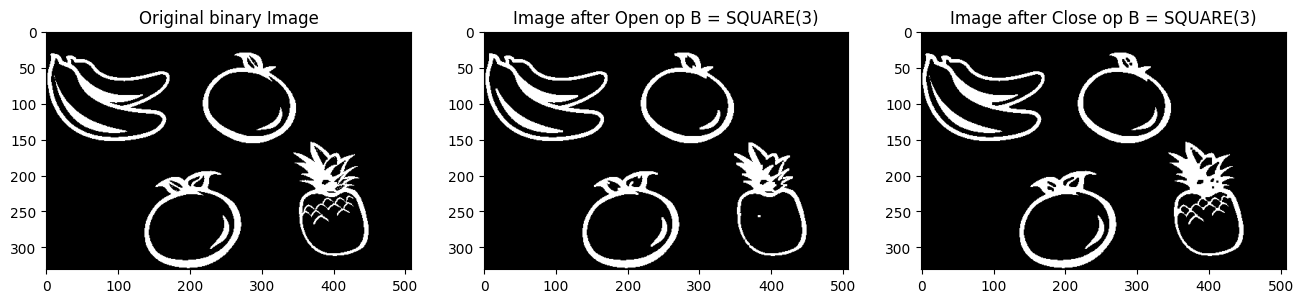

In [39]:
print("using window B = SQUARE(3)")
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (16,9))

ax1.imshow(cv2.cvtColor(bin_img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original binary Image')
# Display the first image in the first subplot
ax2.imshow(cv2.cvtColor(open, cv2.COLOR_BGR2RGB))
ax2.set_title('Image after Open op B = SQUARE(3)')

# Display the second image in the second subplot
ax3.imshow(cv2.cvtColor(close, cv2.COLOR_BGR2RGB))
ax3.set_title('Image after Close op B = SQUARE(3)')

# Show the figure
plt.show()

using window B = CROSS(5)


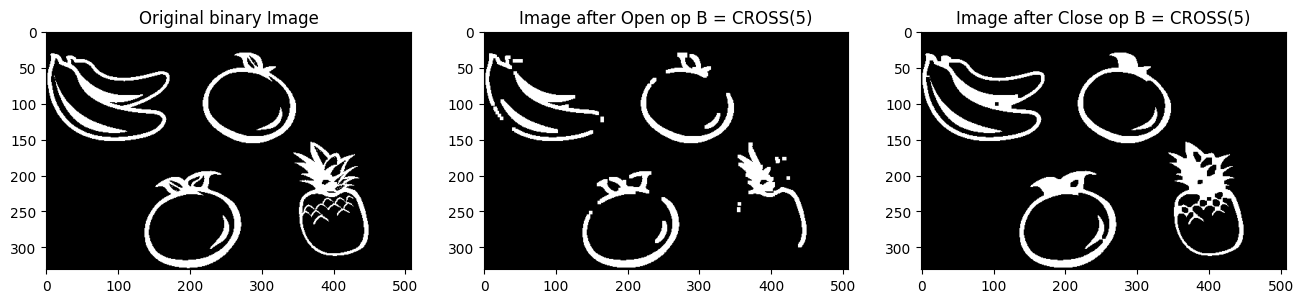

In [50]:
se = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
open = open(bin_img,se)
close = close(bin_img,se)
print("using window B = CROSS(5)")
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (16,9))

ax1.imshow(cv2.cvtColor(bin_img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original binary Image')
# Display the first image in the first subplot
ax2.imshow(cv2.cvtColor(open, cv2.COLOR_BGR2RGB))
ax2.set_title('Image after Open op B = CROSS(5)')

# Display the second image in the second subplot
ax3.imshow(cv2.cvtColor(close, cv2.COLOR_BGR2RGB))
ax3.set_title('Image after Close op B = CROSS(5)')

# Show the figure
plt.show()

# **OPEN-CLOS and CLOS-OPEN operators**

In [51]:
def open(bin_img,se):
  eroded_img = erode(bin_img, se)
  open = dilate(eroded_img, se)
  return open

def close(bin_img,se):
  dilate_img = dilate(bin_img, se)
  close = erode(dilate_img, se)
  return close

In [52]:
def open_close(bin_img,se):
  close_img = close(bin_img, se)
  open_close = open(close_img, se)
  return open_close

def close_open(bin_img,se):
  open_img = open(bin_img, se)
  close_open = close(open_img, se)
  return close_open

In [46]:
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
open_close = open_close(bin_img,se)
close_open = close_open(bin_img,se)

using window B = SQUARE(3)


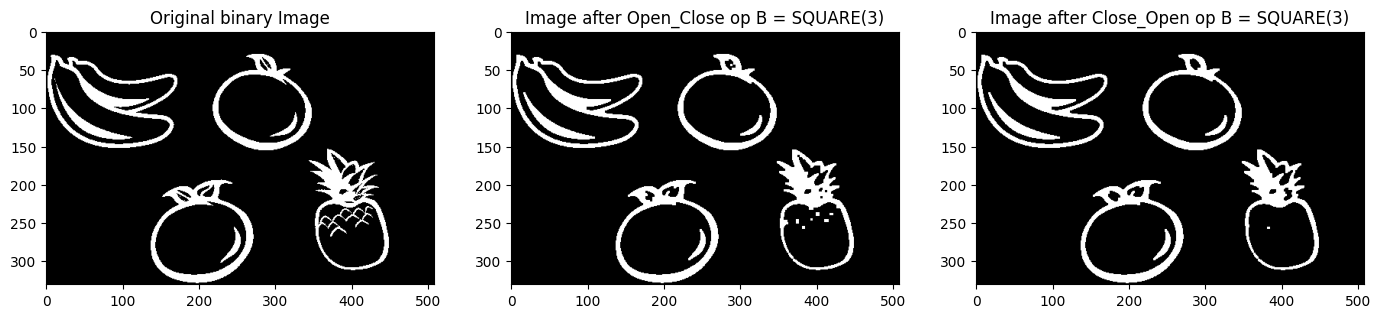

In [47]:
print("using window B = SQUARE(3)")
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (17,9))

ax1.imshow(cv2.cvtColor(bin_img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original binary Image')
# Display the first image in the first subplot
ax2.imshow(cv2.cvtColor(open_close, cv2.COLOR_BGR2RGB))
ax2.set_title('Image after Open_Close op B = SQUARE(3)')

# Display the second image in the second subplot
ax3.imshow(cv2.cvtColor(close_open, cv2.COLOR_BGR2RGB))
ax3.set_title('Image after Close_Open op B = SQUARE(3)')

# Show the figure
plt.show()

In [53]:
se = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
open_close = open_close(bin_img,se)
close_open = close_open(bin_img,se)

using window B = CROSS(5)


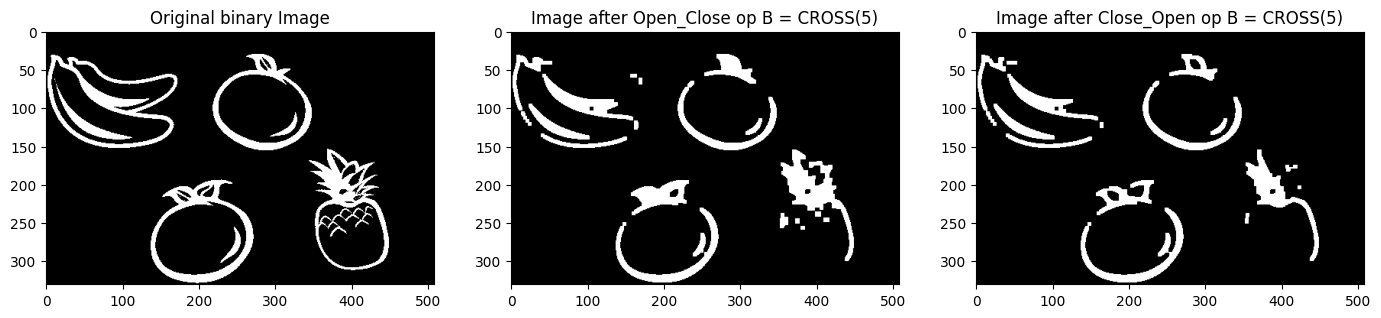

In [54]:
print("using window B = CROSS(5)")
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (17,9))

ax1.imshow(cv2.cvtColor(bin_img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original binary Image')
# Display the first image in the first subplot
ax2.imshow(cv2.cvtColor(open_close, cv2.COLOR_BGR2RGB))
ax2.set_title('Image after Open_Close op B = CROSS(5)')

# Display the second image in the second subplot
ax3.imshow(cv2.cvtColor(close_open, cv2.COLOR_BGR2RGB))
ax3.set_title('Image after Close_Open op B = CROSS(5)')

# Show the figure
plt.show()